In [67]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
from matplotlib.transforms import Bbox

In [212]:
def volume_overlay(ax, quotes, colorup='k', colordown='r', width=4, alpha=1.0):
    ax.set_position(Bbox([[0.125,0.1],[0.9,0.32]]))
    colord = {True: colorup, False: colordown}
    
    ts, opens, highs, lows, closes, volumes = map(np.array, (zip(*quotes)))
    
    # get data from candlesticks for a bar plot
#     dates = [x[0] for x in candlesticks]
#     dates = np.asarray(dates)
#     volume = [x[5] for x in candlesticks]
#     volume = np.asarray(volume)

    # make bar plots and color differently depending on up/down for the day
#     pos = r['open']-r['close']<0
#     neg = r['open']-r['close']>0
    ax.bar(ts[opens>=closes], volumes[opens>=closes], color=colorup, width=1, align='center')
    ax.bar(ts[opens<closes], volumes[opens<closes], color=colordown, width=1, align='center')

    ax.set_xlim(min(ts), max(ts))
    ax.set_ylim(0, max(highs))
    
    # the y-ticks for the bar were too dense, keep only every third one
    yticks = ax.get_yticks()
    ax.set_yticks(yticks[::3])
#     # scale the x-axis tight
#     ax.set_xlim(min(ts), max(ts))
#     # the y-ticks for the bar were too dense, keep only every third one
#     yticks = ax.get_yticks()
#     ax.set_yticks(yticks[::3])

#     ax.yaxis.set_label_position("right")
#     ax.set_ylabel('Volume', size=20)

#     # format the x-ticks with a human-readable date. 
#     xt = ax.get_xticks()
#     new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
#     ax.set_xticklabels(new_xticks,rotation=45, horizontalalignment='right')

#     plt.show()
    
#     # format the x-ticks with a human-readable date. 
#     xt = ax.get_xticks()
#     new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
#     ax.set_xticklabels(new_xticks,rotation=45, horizontalalignment='right')

#     plt.show()


In [213]:
def sma(ax, ts, closes, window=30):
    y = closes.rolling(window).mean()
    ax.plot(ts, y, color='goldenrod', label='SMA'+str(window))
    return y
    
def ema(ax, ts, x, span=12, color='darkslategray'):
    y = x.ewm(span=span).mean()
    ax.plot(ts, y, color=color, label='SMA'+str(window))
    return y

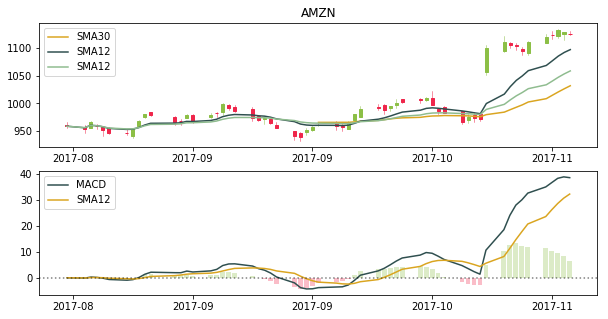

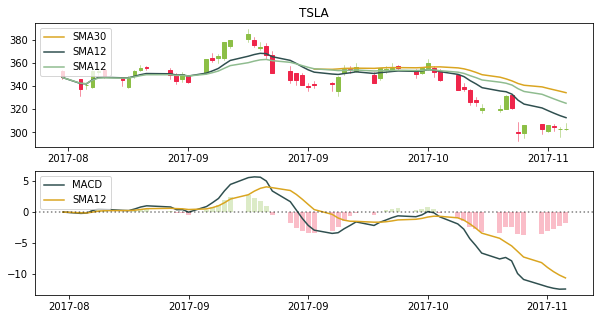

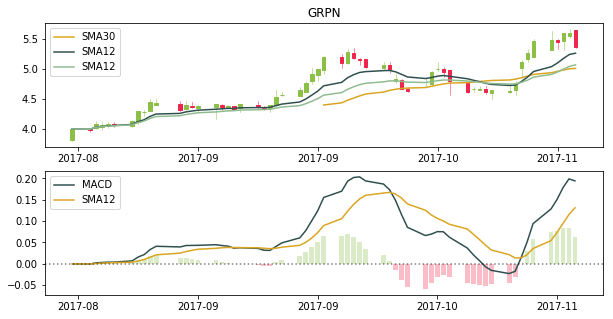

In [214]:
symbols = ['amzn', 'tsla', 'grpn']
limit = 60

colorup = '#8cbf46'
colordown = '#ef264b'


for sym in symbols:
    df = pd.read_csv('data/'+sym+'.us.csv')

    # Converting date to pandas datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    df["Date"] = df["Date"].apply(mdates.date2num)

    # Creating required data in new DataFrame OHLC # Date Open High Low Close Volume OpenInt
    ohlc= df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
    # For shorter timespan
    ohlc = ohlc.tail(limit)

    f1, (ax1, ax2) = plt.subplots(figsize = (10,5), nrows=2)
    ax1.set_title(sym.upper())

    # plot the candlesticks
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup=colorup, colordown=colordown)
    # volume_overlay(ax1.twinx(), ohlc.values)

    sma(ax1, ohlc['Date'], ohlc["Close"])
    ema12 = ema(ax1, ohlc['Date'], ohlc["Close"], span=12)
    ema26 = ema(ax1, ohlc['Date'], ohlc["Close"], span=26, color='darkseagreen')
    
    macd = ema12 - ema26
    ax2.plot(ohlc['Date'], macd, color='darkslategray', label='MACD')
    signal = ema(ax2, ohlc['Date'], macd, span=9, color='goldenrod')
    ax2.axhline(y=0, color='black', linestyle=':', alpha=0.5)
    
    d_macd = macd - signal
    ax2.bar(ohlc['Date'][d_macd>=0], d_macd[d_macd>=0], color=colorup, alpha=0.3)
    ax2.bar(ohlc['Date'][d_macd<0], d_macd[d_macd<0], color=colordown, alpha=0.3)
    
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    plt.show()